## Task-1

### Descriptive Statistics:

In [1]:
import pandas as pd

# Path to the CSV file
file_path = "../src/data/raw_analysis_ratings.csv"

# Load the data into a pandas DataFrame
data = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print(data.head())


   Unnamed: 0                                           headline  \
0           0            Stocks That Hit 52-Week Highs On Friday   
1           1         Stocks That Hit 52-Week Highs On Wednesday   
2           2                      71 Biggest Movers From Friday   
3           3       46 Stocks Moving In Friday's Mid-Day Session   
4           4  B of A Securities Maintains Neutral on Agilent...   

                                                 url          publisher  \
0  https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
1  https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   
2  https://www.benzinga.com/news/20/05/16103463/7...         Lisa Levin   
3  https://www.benzinga.com/news/20/05/16095921/4...         Lisa Levin   
4  https://www.benzinga.com/news/20/05/16095304/b...         Vick Meyer   

                        date stock  
0  2020-06-05 10:30:54-04:00     A  
1  2020-06-03 10:45:20-04:00     A  
2  2020-05-26 04:30:07-04:00 

In [2]:
# Get the number of rows 
num_rows = data.shape[0] 
print(f"The number of rows in the DataFrame is: {num_rows}")

The number of rows in the DataFrame is: 1407328


In [3]:
# Rename the unnamed column to "SNo" 
data.rename(columns={data.columns[0]: 'SNo'}, inplace=True)
# Print the column headers as a list 
print(list(data.columns))

['SNo', 'headline', 'url', 'publisher', 'date', 'stock']


In [4]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 SNo          0
headline     0
url          0
publisher    0
date         0
stock        0
dtype: int64


In [5]:
# Check for duplicate rows 
duplicates = data.duplicated().sum() 
print("Duplicate Rows:\n", duplicates)

Duplicate Rows:
 0


In [6]:
# Convert date column to datetime with ISO8601 format
data['date'] = pd.to_datetime(data['date'], format='ISO8601')

# Calculate basic statistics for headline lengths
data['headline_length'] = data['headline'].apply(len)
headline_stats = data['headline_length'].describe()
print("Headline Length Statistics:\n", headline_stats)

Headline Length Statistics:
 count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


In [7]:
# Count the number of articles per publisher
articles_per_publisher = data['publisher'].value_counts()
print("\nArticles per Publisher:\n", articles_per_publisher)


Articles per Publisher:
 publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
                      ...  
MoneyGeek                 1
muathe                    1
Robert Morris             1
LeftCoastHedgie           1
Jeremie Capron            1
Name: count, Length: 1034, dtype: int64



Publication Trends Over Time:
 date
2009-02-14      1
2009-04-27      2
2009-04-29      1
2009-05-22      1
2009-05-27      6
             ... 
2020-06-07     25
2020-06-08    765
2020-06-09    804
2020-06-10    806
2020-06-11    544
Name: count, Length: 3955, dtype: int64


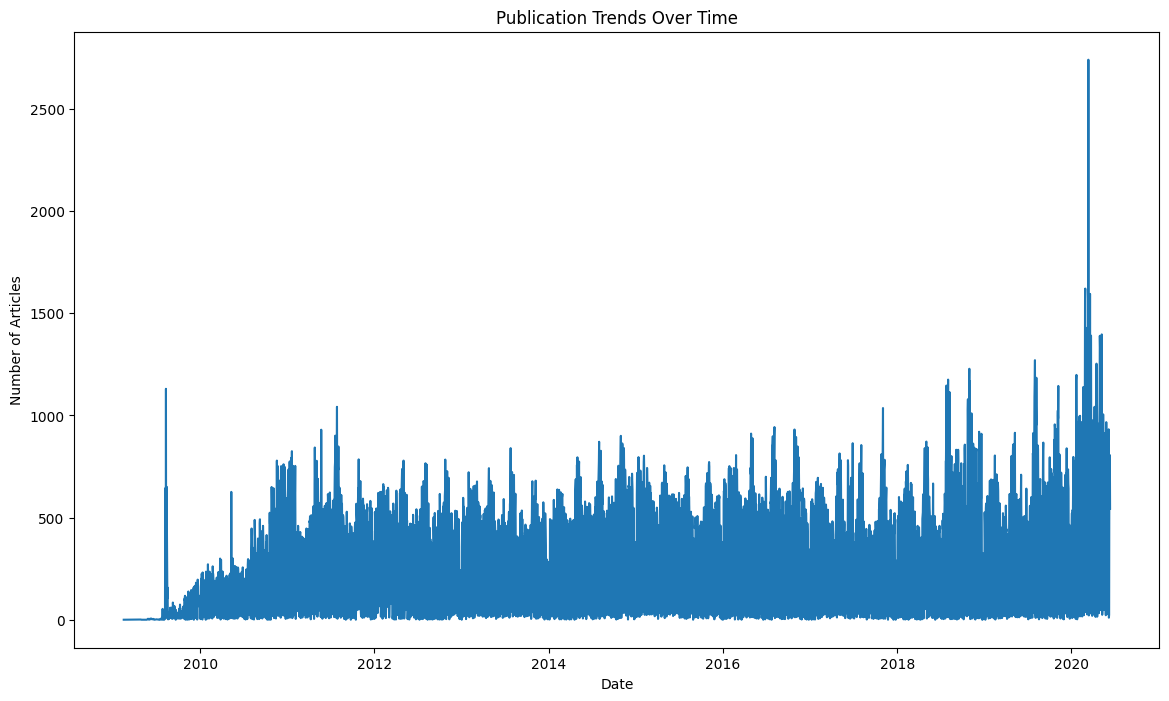

In [8]:
# Analyze publication dates
publication_trends = data['date'].dt.date.value_counts().sort_index()
print("\nPublication Trends Over Time:\n", publication_trends)

# Plot publication trends over time
import matplotlib.pyplot as plt

publication_trends.plot(kind='line', figsize=(14, 8))
plt.title('Publication Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.show()

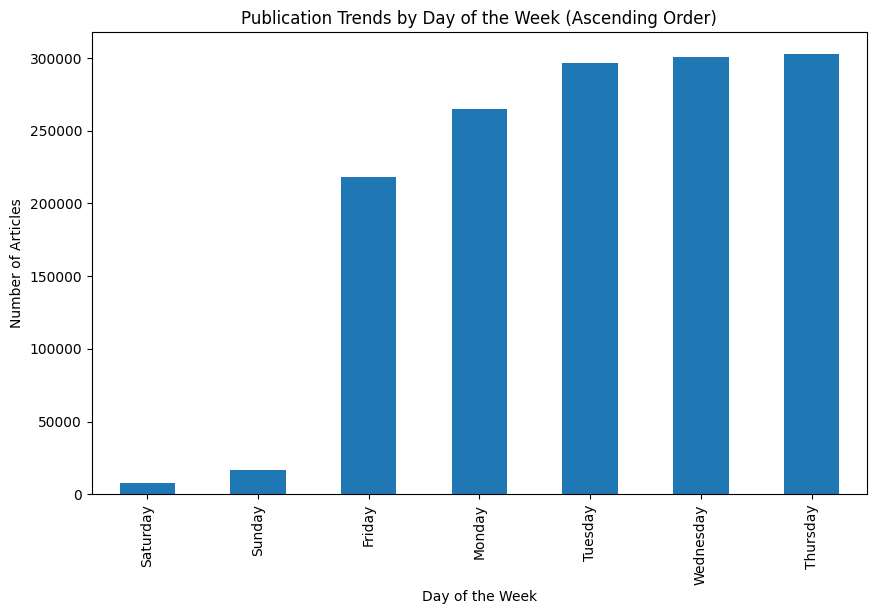

In [9]:
# Extract day of the week from date
data['day_of_week'] = data['date'].dt.day_name()

# Analyze publication trends by day of the week
publication_by_day = data['day_of_week'].value_counts().sort_index()

# Sort in ascending order
publication_by_day_sorted = publication_by_day.sort_values()

# Plot publication trends by day of the week in ascending order
import matplotlib.pyplot as plt

publication_by_day_sorted.plot(kind='bar', figsize=(10, 6))
plt.title('Publication Trends by Day of the Week (Ascending Order)')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Articles')
plt.show()

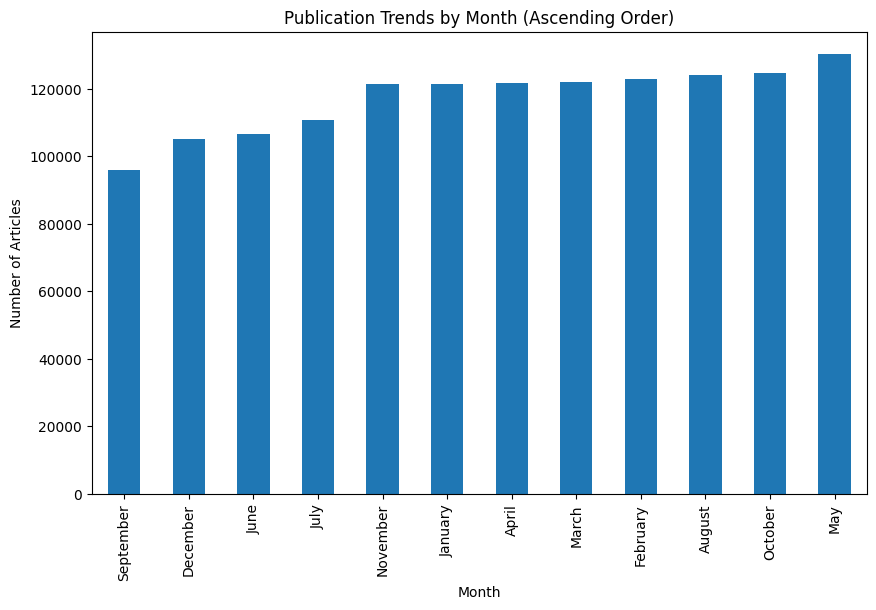

In [10]:
# Extract month from date
data['month'] = data['date'].dt.month_name()

# Analyze publication trends by month
publication_by_month = data['month'].value_counts().sort_index()

# Sort in ascending order
publication_by_month_sorted = publication_by_month.sort_values()

# Plot publication trends by month in ascending order
publication_by_month_sorted.plot(kind='bar', figsize=(10, 6))
plt.title('Publication Trends by Month (Ascending Order)')
plt.xlabel('Month')
plt.ylabel('Number of Articles')
plt.show()

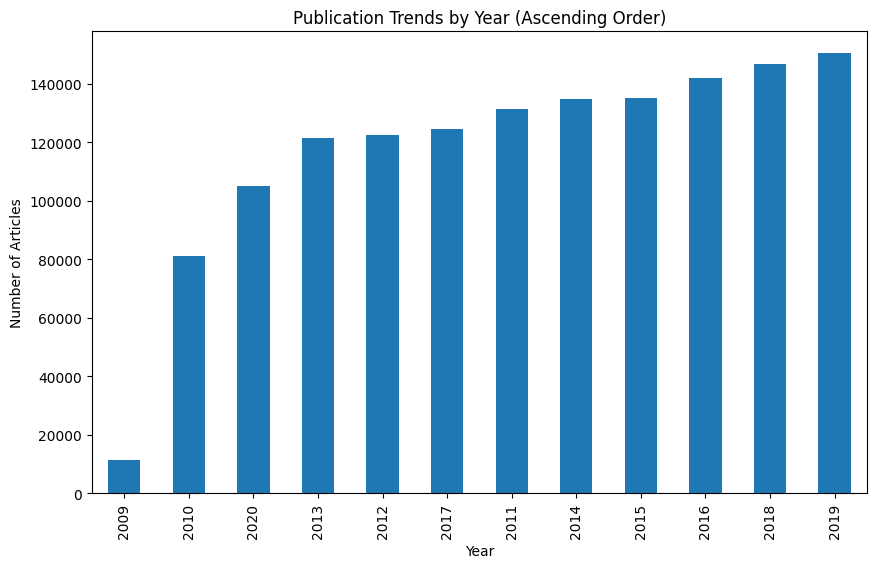

In [11]:
# Extract year from date
data['year'] = data['date'].dt.year

# Analyze publication trends by year
publication_by_year = data['year'].value_counts().sort_index()

# Sort in ascending order
publication_by_year_sorted = publication_by_year.sort_values()

# Plot publication trends by year in ascending order
publication_by_year_sorted.plot(kind='bar', figsize=(10, 6))
plt.title('Publication Trends by Year (Ascending Order)')
plt.xlabel('Year')
plt.ylabel('Number of Articles')
plt.show()

### Text Analysis(Sentiment analysis & Topic Modeling):

Sentiment Distribution:
 sentiment_label
neutral     934902
positive    341180
negative    131246
Name: count, dtype: int64


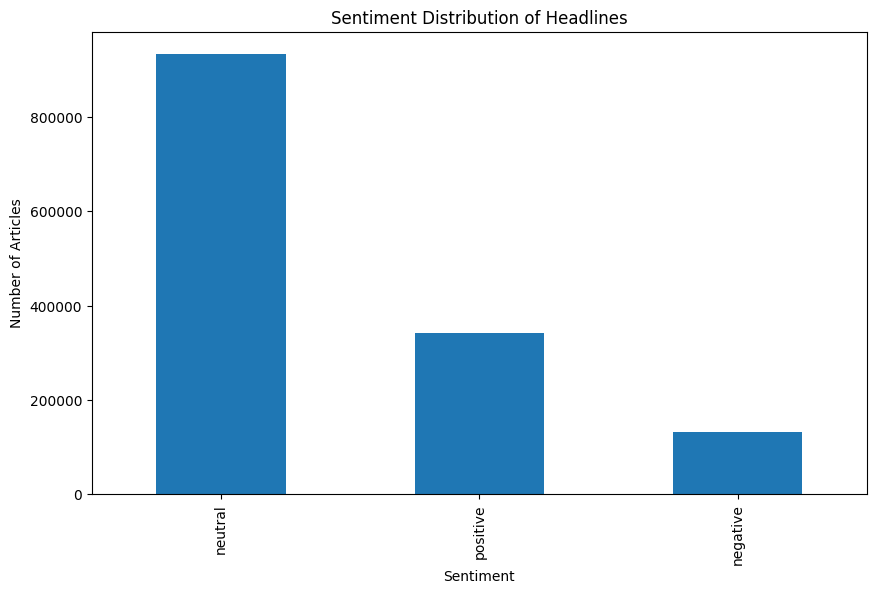

In [12]:
from textblob import TextBlob
# Normalize text data by converting to lowercase 
data['headline'] = data['headline'].str.lower()

# Perform sentiment analysis
data['sentiment'] = data['headline'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Classify sentiment as positive, negative, or neutral
data['sentiment_label'] = data['sentiment'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))

# Display sentiment distribution
sentiment_distribution = data['sentiment_label'].value_counts()
print("Sentiment Distribution:\n", sentiment_distribution)

# Plot sentiment distribution
import matplotlib.pyplot as plt

sentiment_distribution.plot(kind='bar', figsize=(10, 6))
plt.title('Sentiment Distribution of Headlines')
plt.xlabel('Sentiment')
plt.ylabel('Number of Articles')
plt.show()

Top 20 Common Phrases (Descending Order):
 {'vs': np.int64(162099), 'stocks': np.int64(161776), 'est': np.int64(140604), 'eps': np.int64(128897), 'market': np.int64(120558), 'shares': np.int64(114313), 'reports': np.int64(108710), 'update': np.int64(91723), 'earnings': np.int64(87399), 'sales': np.int64(79645), 'benzinga': np.int64(74516), 'pt': np.int64(73068), 'week': np.int64(69572), 'announces': np.int64(66591), 'price': np.int64(64407), 'buy': np.int64(64371), 'mid': np.int64(62263), 'downgrades': np.int64(61959), 'trading': np.int64(61182), 'raises': np.int64(57802)}


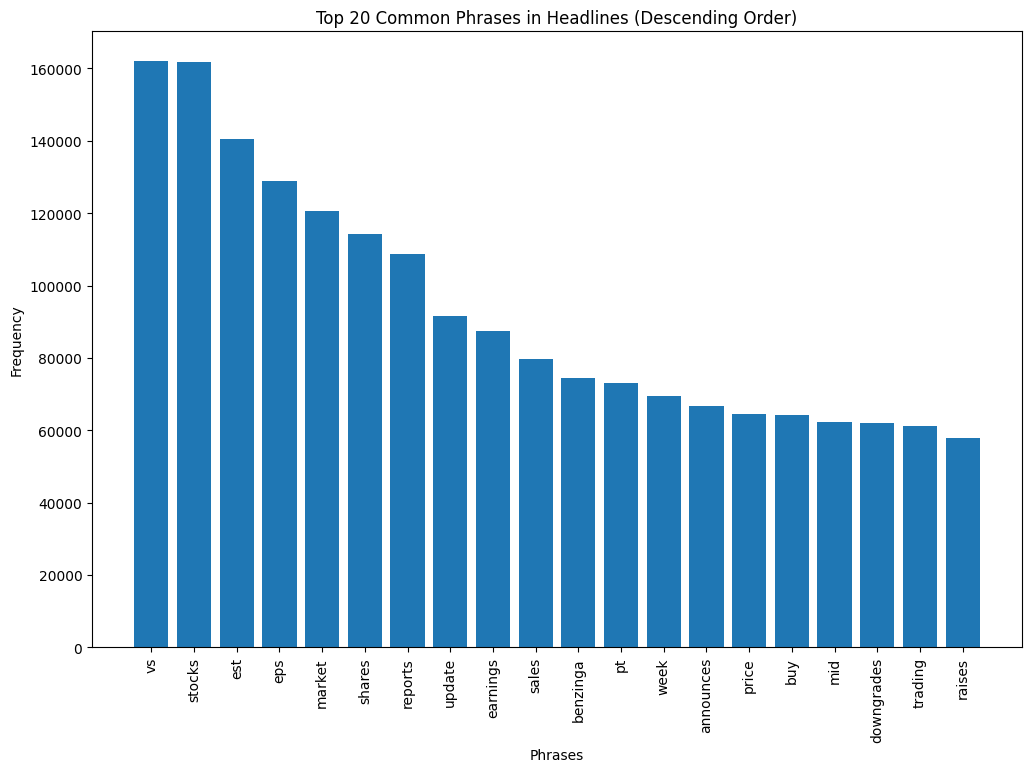

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

# Extract common keywords or phrases using CountVectorizer
count_vectorizer = CountVectorizer(stop_words='english', ngram_range=(1, 2), max_features=20)
X_count = count_vectorizer.fit_transform(data['headline'])
common_phrases = count_vectorizer.get_feature_names_out()

# Count common phrases
phrase_counts = X_count.toarray().sum(axis=0)
phrase_counts_dict = dict(zip(common_phrases, phrase_counts))

# Sort common phrases in descending order
sorted_phrase_counts = dict(sorted(phrase_counts_dict.items(), key=lambda item: item[1], reverse=True))
print("Top 20 Common Phrases (Descending Order):\n", sorted_phrase_counts)

# Plot top 20 common phrases in descending order
plt.figure(figsize=(12, 8))
plt.bar(sorted_phrase_counts.keys(), sorted_phrase_counts.values())
plt.title('Top 20 Common Phrases in Headlines (Descending Order)')
plt.xlabel('Phrases')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

Top 20 Common Phrases (Descending Order):
 {'52 week': np.int64(51006), 'price target': np.int64(47274), 'stocks moving': np.int64(40044), 'mid day': np.int64(37324), 'market update': np.int64(33101), 'earnings scheduled': np.int64(32055), 'initiates coverage': np.int64(28993), 'pre market': np.int64(28393), 'raises pt': np.int64(27213), 'companies trading': np.int64(23170), 'trading higher': np.int64(22700), 'market session': np.int64(22428), 'vs est': np.int64(21843), 'adj eps': np.int64(21708), 'benzinga upgrades': np.int64(21108), 'q1 eps': np.int64(20704), 'q2 eps': np.int64(20258), 'q3 eps': np.int64(20043), 'stocks hit': np.int64(20030), 'trading lower': np.int64(20018)}


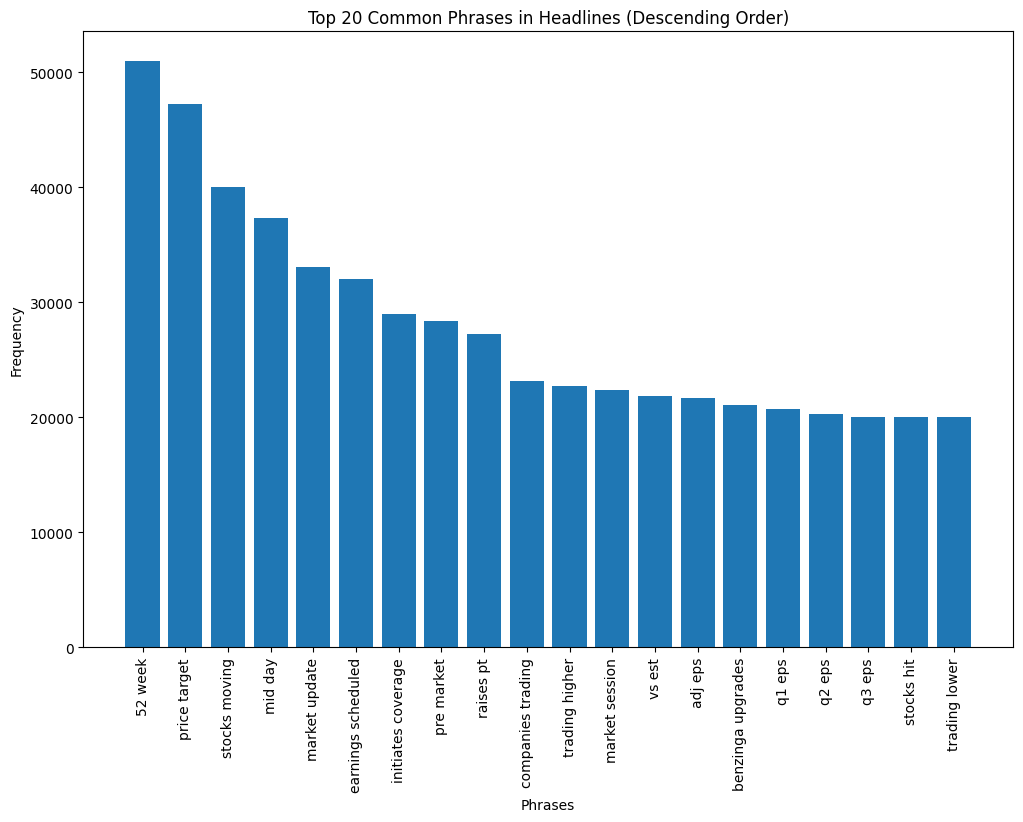

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

# Extract common phrases (bigrams) using CountVectorizer
count_vectorizer = CountVectorizer(stop_words='english', ngram_range=(2, 2), max_features=20)
X_count = count_vectorizer.fit_transform(data['headline'])
common_phrases = count_vectorizer.get_feature_names_out()

# Count common phrases
phrase_counts = X_count.toarray().sum(axis=0)
phrase_counts_dict = dict(zip(common_phrases, phrase_counts))

# Sort common phrases in descending order
sorted_phrase_counts = dict(sorted(phrase_counts_dict.items(), key=lambda item: item[1], reverse=True))
print("Top 20 Common Phrases (Descending Order):\n", sorted_phrase_counts)

# Plot top 20 common phrases in descending order
plt.figure(figsize=(12, 8))
plt.bar(sorted_phrase_counts.keys(), sorted_phrase_counts.values())
plt.title('Top 20 Common Phrases in Headlines (Descending Order)')
plt.xlabel('Phrases')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

Top 20 Common Phrases (Descending Order):
 {'pre market session': np.int64(21665), 'hit 52 week': np.int64(19971), 'stocks hit 52': np.int64(19903), 'new 52 week': np.int64(19255), '52 week highs': np.int64(18012), 'set new 52': np.int64(16777), 'stocks set new': np.int64(16777), 'raises price target': np.int64(15280), 'benzinga upgrades downgrades': np.int64(14508), '52 week lows': np.int64(14333), 'mid day session': np.int64(14210), 'biggest movers yesterday': np.int64(13942), 'lowers price target': np.int64(12986), 'reports q2 eps': np.int64(12820), 'reports q3 eps': np.int64(12804), 'reports q4 eps': np.int64(12454), 'companies trading higher': np.int64(11838), 'market update markets': np.int64(11760), 'reports q1 eps': np.int64(11679), 'companies trading lower': np.int64(11280)}


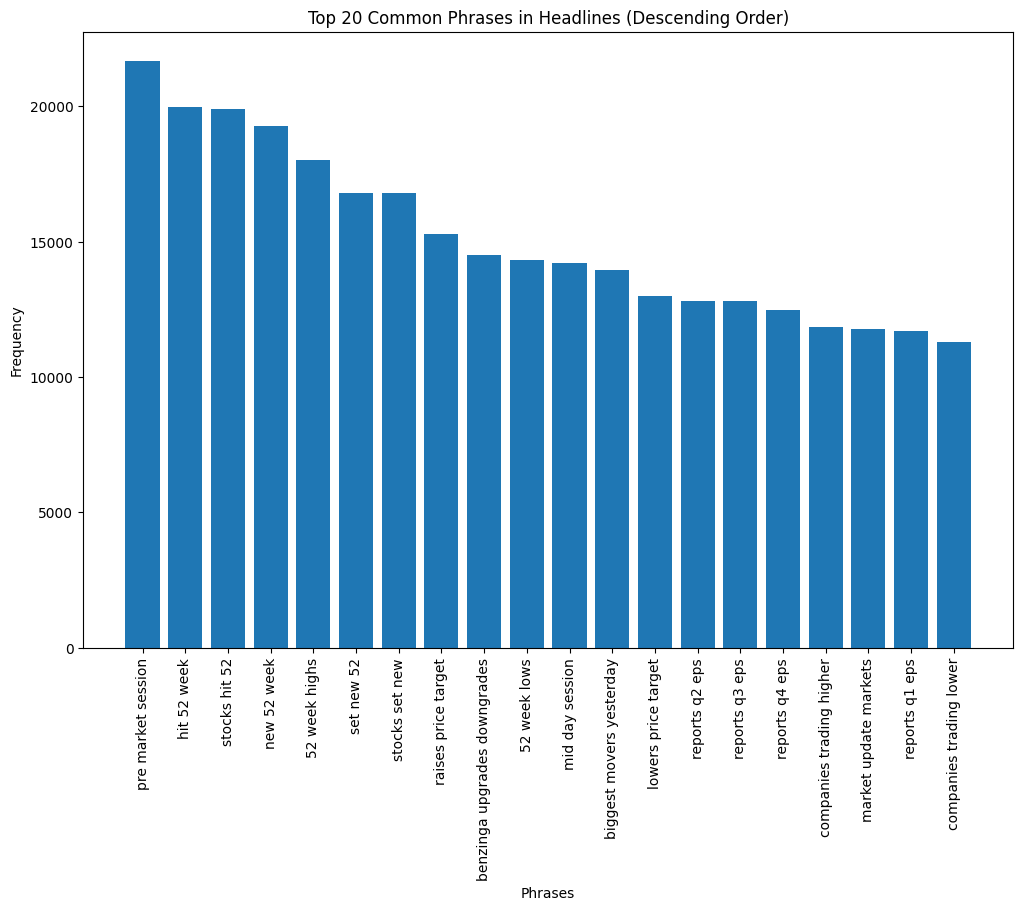

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

# Extract common phrases (trigrams) using CountVectorizer
count_vectorizer = CountVectorizer(stop_words='english', ngram_range=(3, 3), max_features=20)
X_count = count_vectorizer.fit_transform(data['headline'])
common_phrases = count_vectorizer.get_feature_names_out()

# Count common phrases
phrase_counts = X_count.toarray().sum(axis=0)
phrase_counts_dict = dict(zip(common_phrases, phrase_counts))

# Sort common phrases in descending order
sorted_phrase_counts = dict(sorted(phrase_counts_dict.items(), key=lambda item: item[1], reverse=True))
print("Top 20 Common Phrases (Descending Order):\n", sorted_phrase_counts)

# Plot top 20 common phrases in descending order
plt.figure(figsize=(12, 8))
plt.bar(sorted_phrase_counts.keys(), sorted_phrase_counts.values())
plt.title('Top 20 Common Phrases in Headlines (Descending Order)')
plt.xlabel('Phrases')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

### Time Series Analysis:

Code to Analyze Publication Frequency Over Time

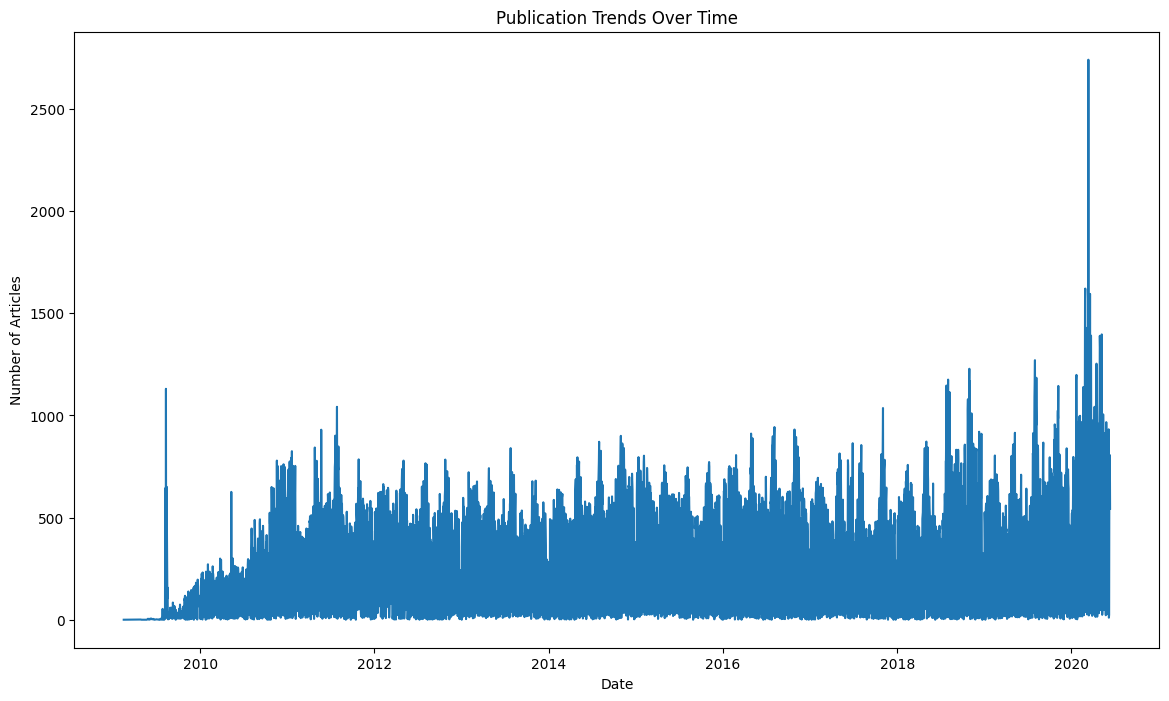

In [16]:
# Analyze publication dates 
publication_trends = data['date'].dt.date.value_counts().sort_index() 
# Plot publication trends over time 
plt.figure(figsize=(14, 8)) 
publication_trends.plot(kind='line') 
plt.title('Publication Trends Over Time') 
plt.xlabel('Date') 
plt.ylabel('Number of Articles') 
plt.show()


Identify Spikes Related to Specific Market Events

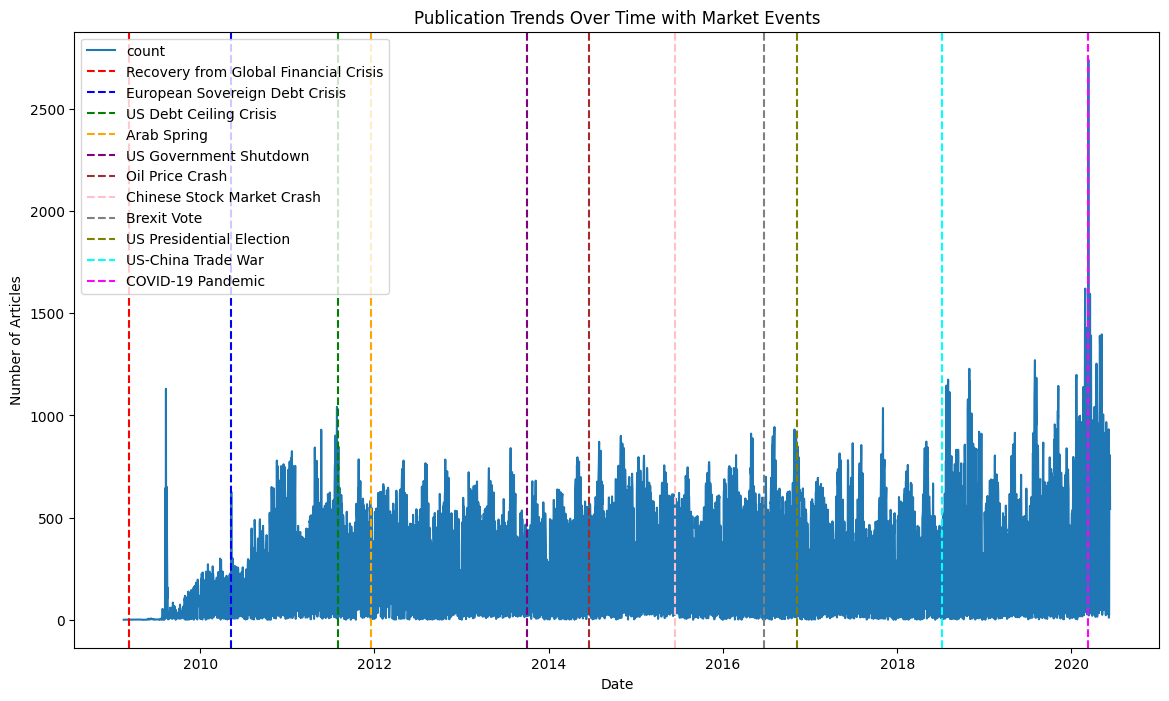

In [17]:
# List of significant market events
market_events = {
    '2009-03-09': 'Recovery from Global Financial Crisis',
    '2010-05-09': 'European Sovereign Debt Crisis',
    '2011-08-02': 'US Debt Ceiling Crisis',
    '2011-12-17': 'Arab Spring',
    '2013-10-01': 'US Government Shutdown',
    '2014-06-20': 'Oil Price Crash',
    '2015-06-12': 'Chinese Stock Market Crash',
    '2016-06-23': 'Brexit Vote',
    '2016-11-08': 'US Presidential Election',
    '2018-07-06': 'US-China Trade War',
    '2020-03-11': 'COVID-19 Pandemic'
}

# List of colors for the events
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan', 'magenta']

# Plot publication trends over time with market events
plt.figure(figsize=(14, 8))
publication_trends.plot(kind='line')
for i, (event_date, event_name) in enumerate(market_events.items()):
    plt.axvline(pd.to_datetime(event_date), color=colors[i % len(colors)], linestyle='--', label=event_name)
plt.title('Publication Trends Over Time with Market Events')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.legend()
plt.show()

publication trends by hour

Publication Trends by Hour (AM/PM Format) in Descending Order:
12 AM: 1351408 articles
10 AM: 7669 articles
9 AM: 5965 articles
12 PM: 5732 articles
11 AM: 5701 articles
8 AM: 5527 articles
7 AM: 5033 articles
4 PM: 3939 articles
5 PM: 2800 articles
1 PM: 2710 articles
6 AM: 2476 articles
2 PM: 2075 articles
5 AM: 1829 articles
3 PM: 1612 articles
4 AM: 1469 articles
6 PM: 704 articles
7 PM: 227 articles
8 PM: 131 articles
3 AM: 93 articles
9 PM: 82 articles
2 AM: 57 articles
10 PM: 48 articles
11 PM: 27 articles
1 AM: 14 articles


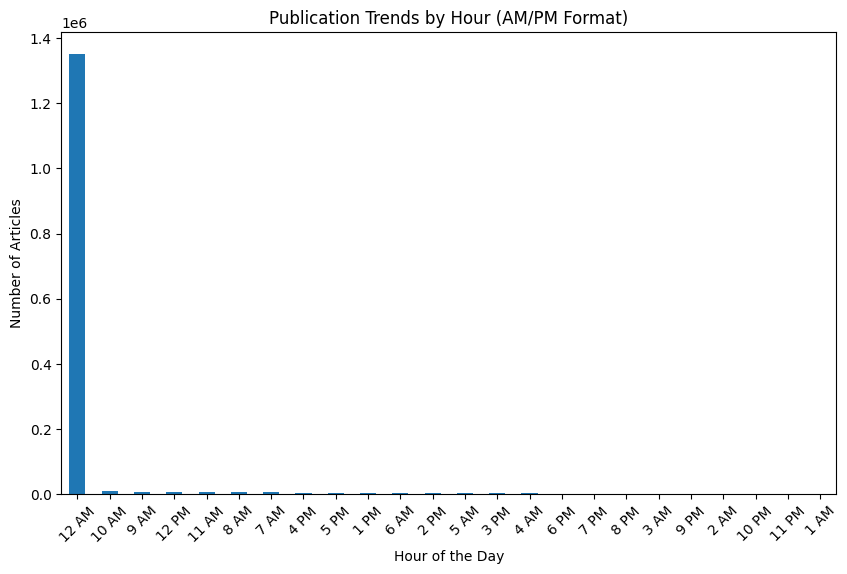

In [18]:
# Extract hour from date
data['hour'] = data['date'].dt.hour

# Convert hour to AM/PM format
def convert_to_ampm(hour):
    if hour == 0:
        return '12 AM'
    elif hour < 12:
        return f'{hour} AM'
    elif hour == 12:
        return '12 PM'
    else:
        return f'{hour - 12} PM'

data['hour_ampm'] = data['hour'].apply(convert_to_ampm)

# Analyze publication trends by hour in AM/PM format
publication_by_hour_ampm = data['hour_ampm'].value_counts().sort_values(ascending=False)

# Print publication trends by hour in AM/PM format in descending order
print("Publication Trends by Hour (AM/PM Format) in Descending Order:")
for hour_ampm, count in publication_by_hour_ampm.items():
    print(f"{hour_ampm}: {count} articles")

# Plot publication trends by hour in AM/PM format
plt.figure(figsize=(10, 6))
publication_by_hour_ampm.plot(kind='bar')
plt.title('Publication Trends by Hour (AM/PM Format)')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.show()

### Publisher Analysis:

Top Publishers by Number of Articles:
publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64


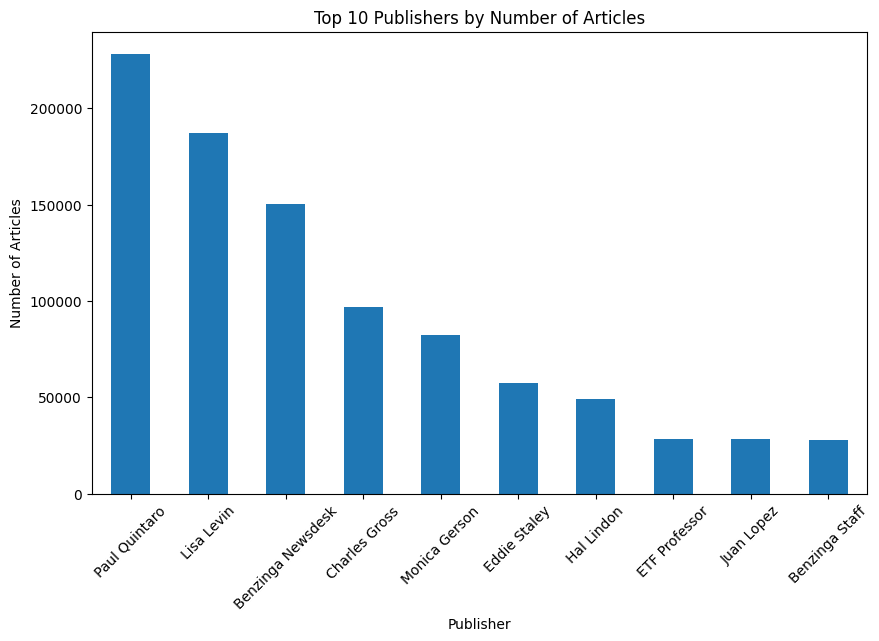

In [19]:
import re
from textblob import TextBlob

# Perform sentiment analysis
data['headline'] = data['headline'].str.lower()
data['sentiment'] = data['headline'].apply(lambda x: TextBlob(x).sentiment.polarity)
data['sentiment_label'] = data['sentiment'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))

# Count the number of articles per publisher
articles_per_publisher = data['publisher'].value_counts()

# Print the top publishers
print("Top Publishers by Number of Articles:")
print(articles_per_publisher.head(10))

# Plot the top publishers
plt.figure(figsize=(10, 6))
articles_per_publisher.head(10).plot(kind='bar')
plt.title('Top 10 Publishers by Number of Articles')
plt.xlabel('Publisher')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.show()

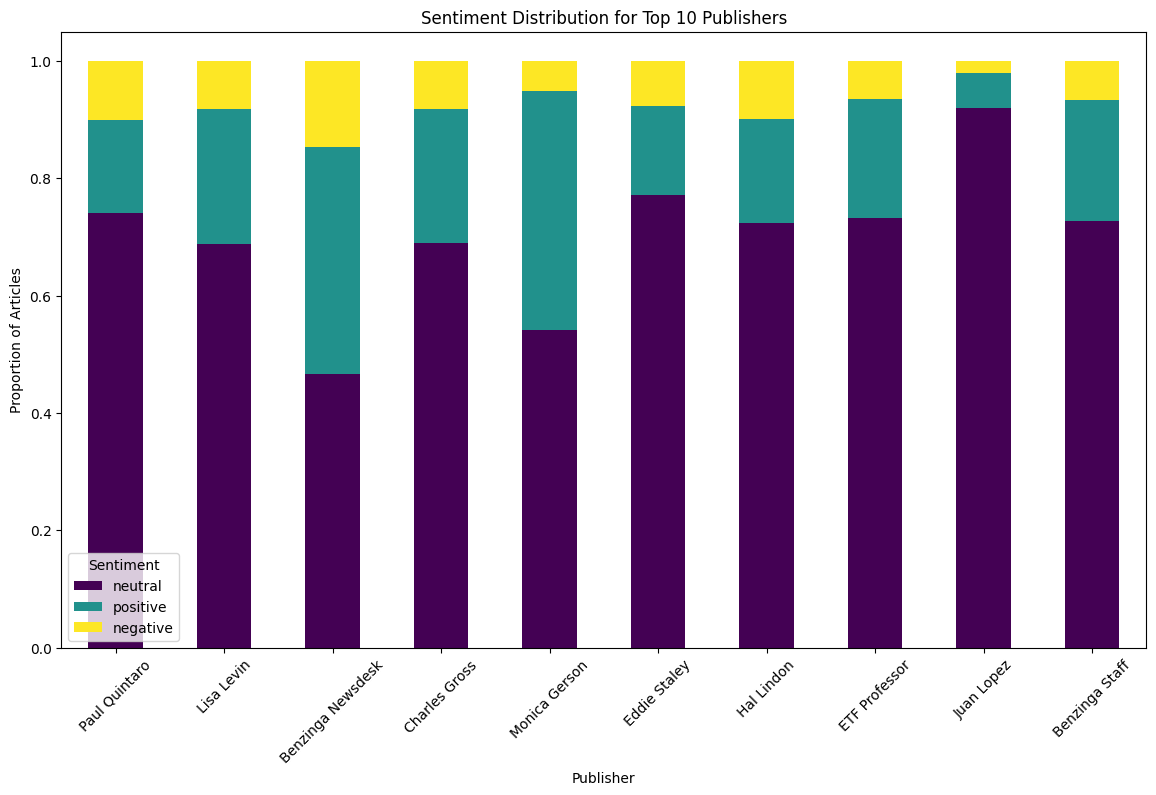

In [20]:
from textblob import TextBlob

# Perform sentiment analysis
data['headline'] = data['headline'].str.lower()
data['sentiment'] = data['headline'].apply(lambda x: TextBlob(x).sentiment.polarity)
data['sentiment_label'] = data['sentiment'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))

# Count the number of articles per publisher
articles_per_publisher = data['publisher'].value_counts()

# Analyze the type of news reported by top publishers
top_publishers = articles_per_publisher.head(10).index
sentiment_data = pd.DataFrame()

for publisher in top_publishers:
    publisher_data = data[data['publisher'] == publisher]
    sentiment_distribution = publisher_data['sentiment_label'].value_counts(normalize=True)
    sentiment_data[publisher] = sentiment_distribution

# Transpose the DataFrame for plotting
sentiment_data = sentiment_data.T
sentiment_data = sentiment_data.fillna(0)

# Plot the combined sentiment distribution
sentiment_data.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis')
plt.title('Sentiment Distribution for Top 10 Publishers')
plt.xlabel('Publisher')
plt.ylabel('Proportion of Articles')
plt.legend(title='Sentiment')
plt.xticks(rotation=45)
plt.show()

In [21]:
# Count the number of articles per publisher
articles_per_publisher = data['publisher'].value_counts()

# Analyze the type of news reported by top publishers
top_publishers = articles_per_publisher.head(10).index
sentiment_data = pd.DataFrame()

for publisher in top_publishers:
    publisher_data = data[data['publisher'] == publisher]
    sentiment_distribution = publisher_data['sentiment_label'].value_counts(normalize=True)
    sentiment_data[publisher] = sentiment_distribution

# Transpose the DataFrame for the table
sentiment_data = sentiment_data.T
sentiment_data = sentiment_data.fillna(0)

# Print the table
print("Sentiment Distribution for Top 10 Publishers:")
print(sentiment_data)


Sentiment Distribution for Top 10 Publishers:
sentiment_label     neutral  positive  negative
Paul Quintaro      0.741616  0.158556  0.099828
Lisa Levin         0.687393  0.230769  0.081838
Benzinga Newsdesk  0.467146  0.386971  0.145883
Charles Gross      0.689079  0.228487  0.082434
Monica Gerson      0.541867  0.407356  0.050777
Eddie Staley       0.771667  0.151273  0.077060
Hal Lindon         0.724203  0.177850  0.097947
ETF Professor      0.731651  0.203868  0.064481
Juan Lopez         0.920705  0.058443  0.020852
Benzinga Staff     0.726720  0.206836  0.066444


Top Domains by Number of Articles:
publisher_domain
benzinga.com              7937
gmail.com                  139
andyswan.com                 5
investdiva.com               2
tothetick.com                2
eosdetroit.io                1
forextraininggroup.com       1
stockmetrix.net              1
Name: count, dtype: int64


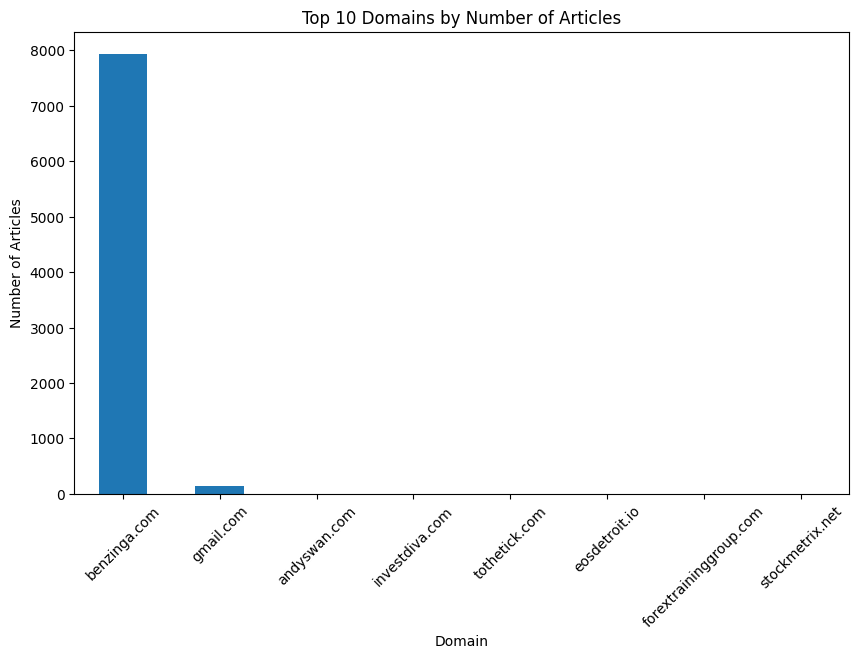

In [22]:
# Function to extract domain from email address
def extract_domain(email):
    match = re.search(r'@([\w.-]+)', email)
    return match.group(1) if match else None

# Extract domains from publisher email addresses
data['publisher_domain'] = data['publisher'].apply(extract_domain)

# Count the number of articles per domain
articles_per_domain = data['publisher_domain'].value_counts()

# Print the top domains
print("Top Domains by Number of Articles:")
print(articles_per_domain.head(10))

# Plot the top domains
plt.figure(figsize=(10, 6))
articles_per_domain.head(10).plot(kind='bar')
plt.title('Top 10 Domains by Number of Articles')
plt.xlabel('Domain')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.show()

## Task 2: Quantitative analysis using pynance and TaLib